In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## There are two datasets used in this notebooks
* Prediction of RUL (in terms of %) - A Regression Problem
* Identification of tool wear - A Classification Problem

# RUL Prediction

## **Dataset Creation**

The dataset used to predict the RUL is obtained from NASA Milling dataset. Basically, 16 different experiments were conducted and ran till the tool was worn out. 

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv(r'Data\mill.csv')
df.head()

,Unnamed: 0,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


# Exploratory Data Analysis

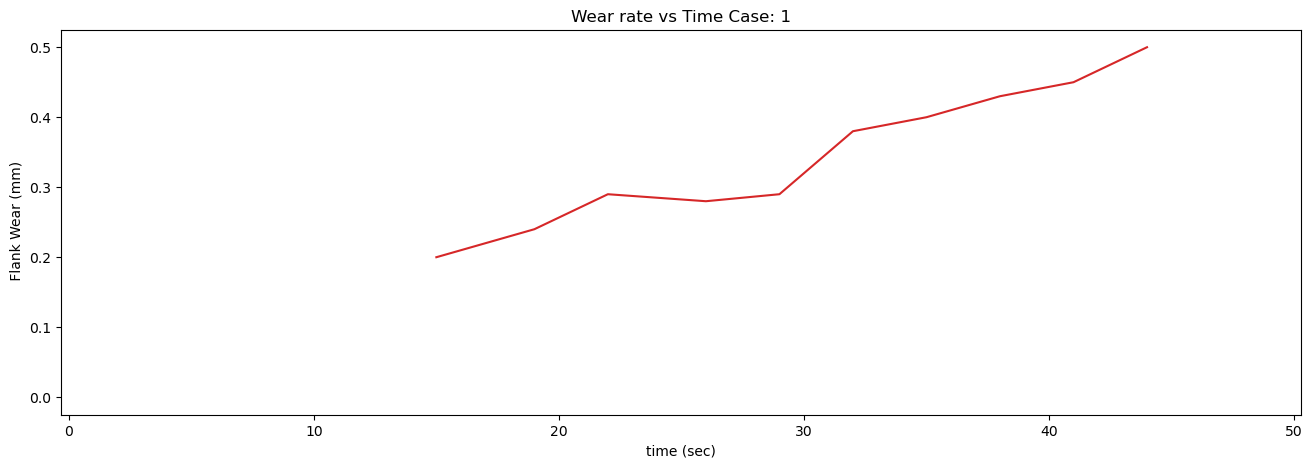

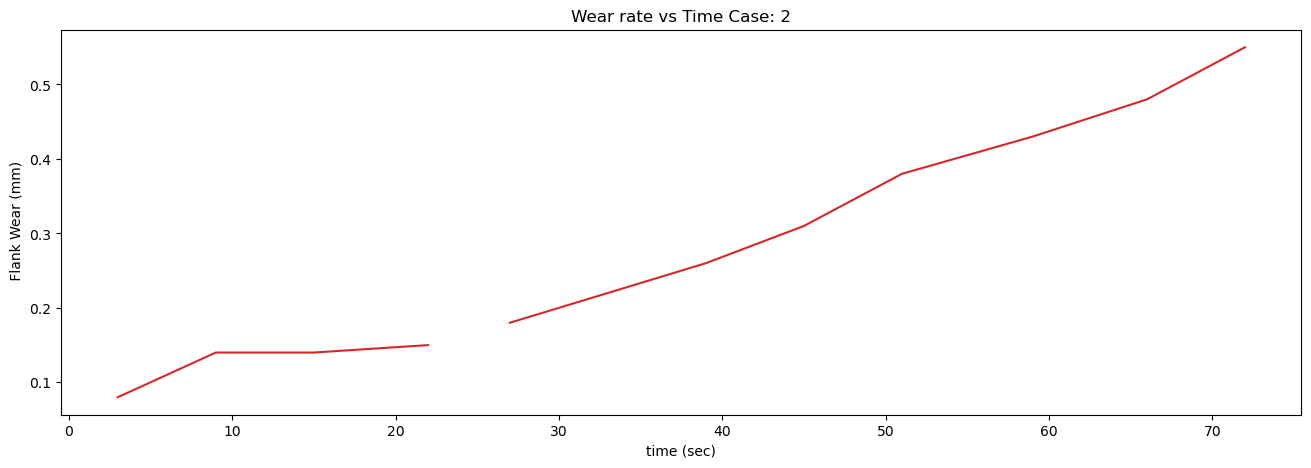

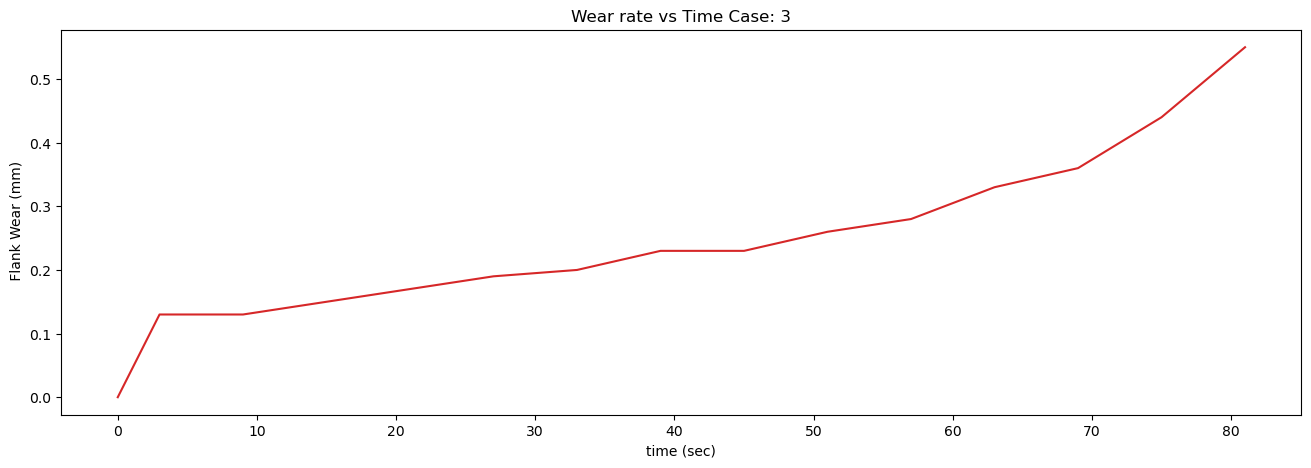

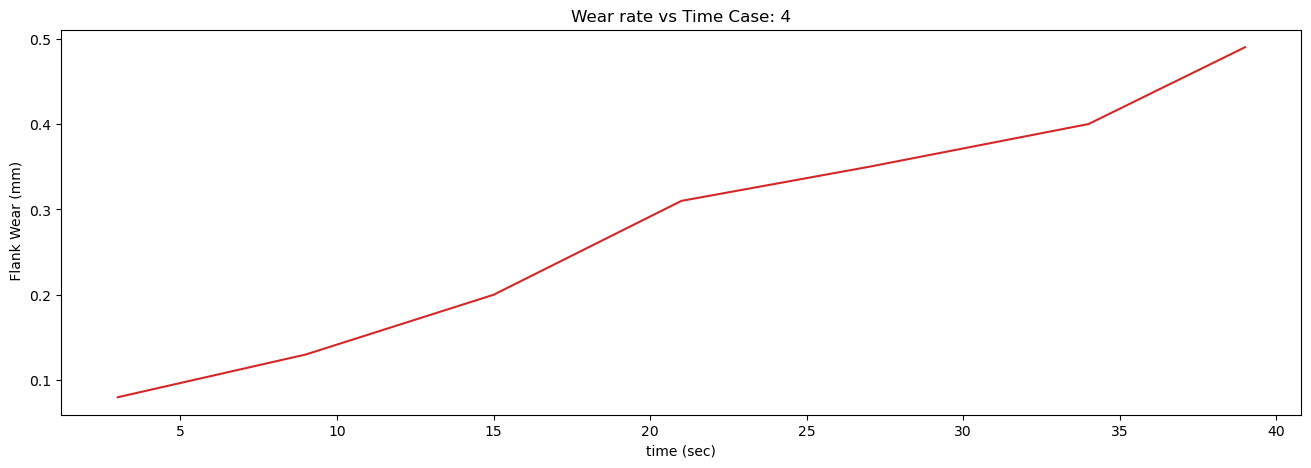

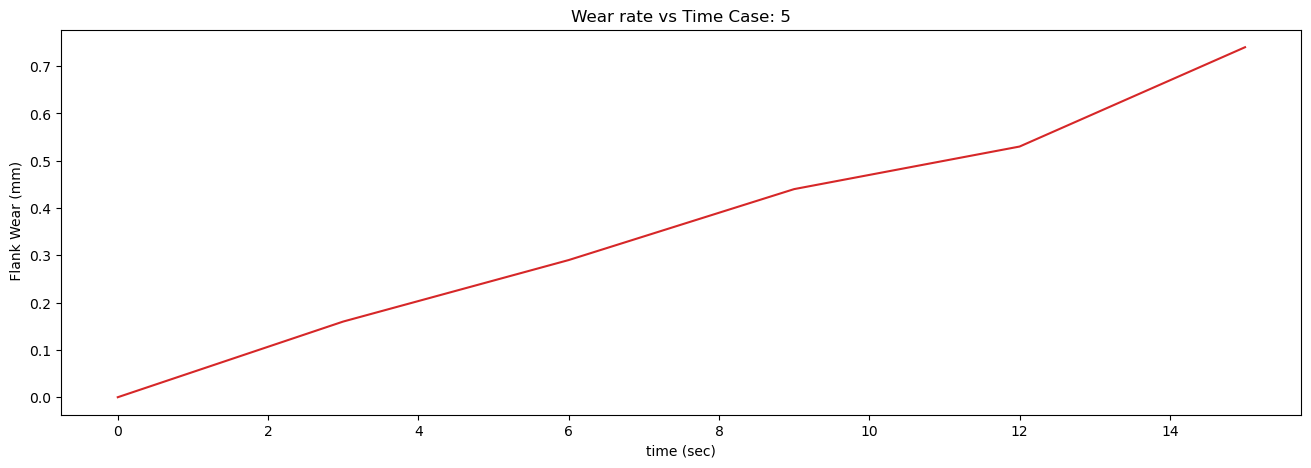

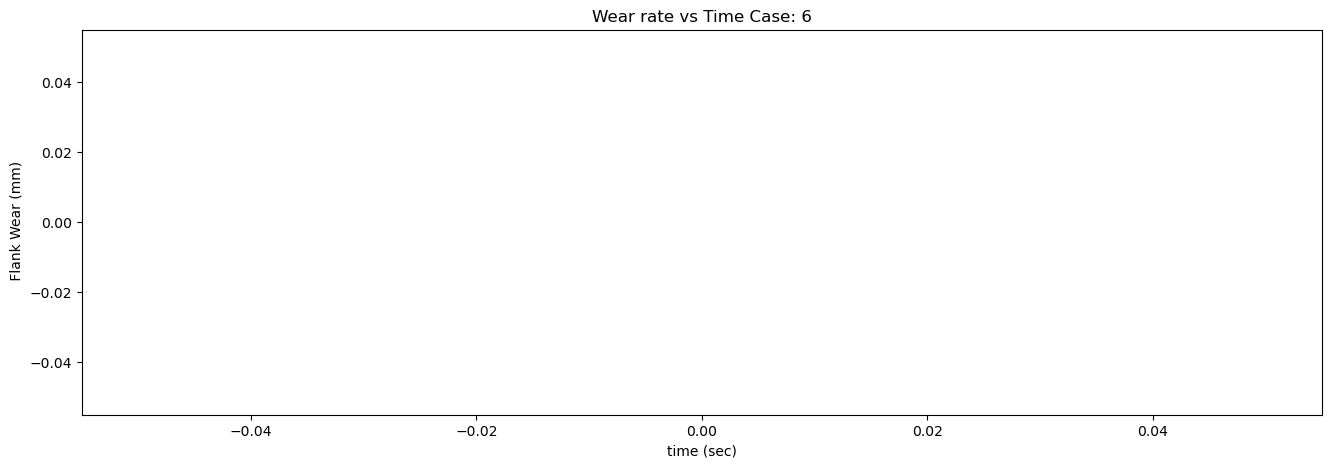

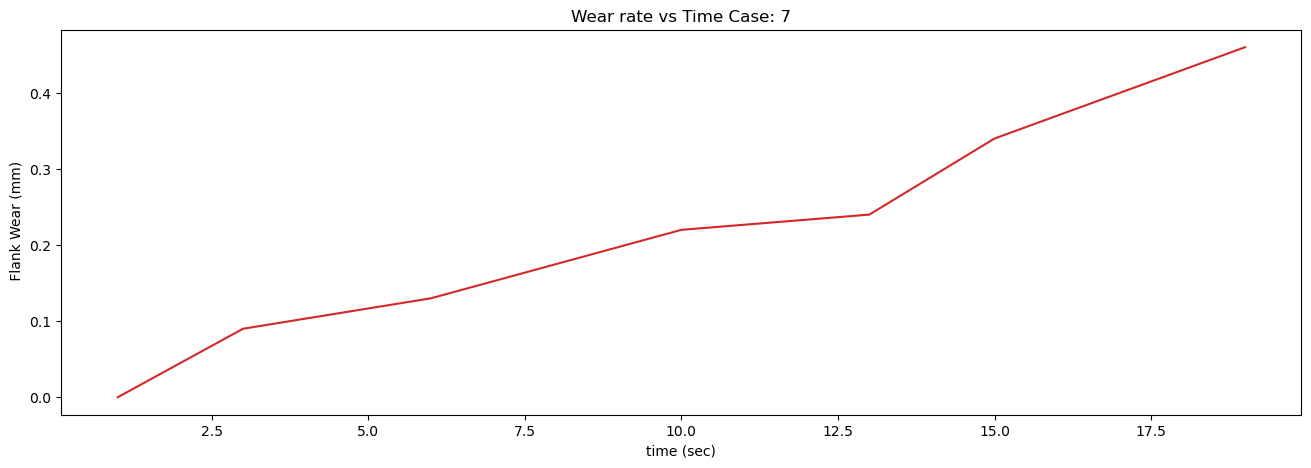

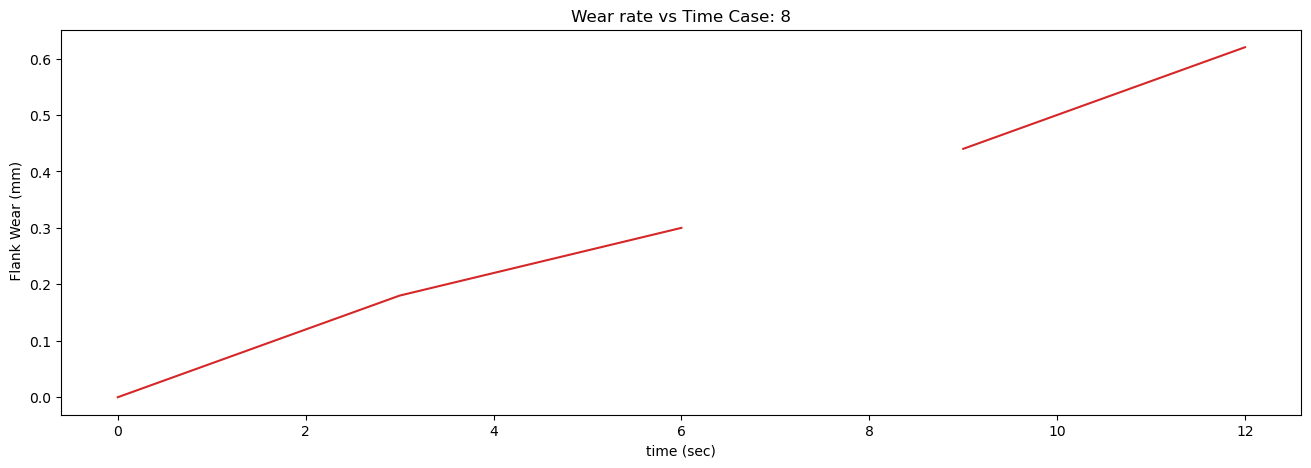

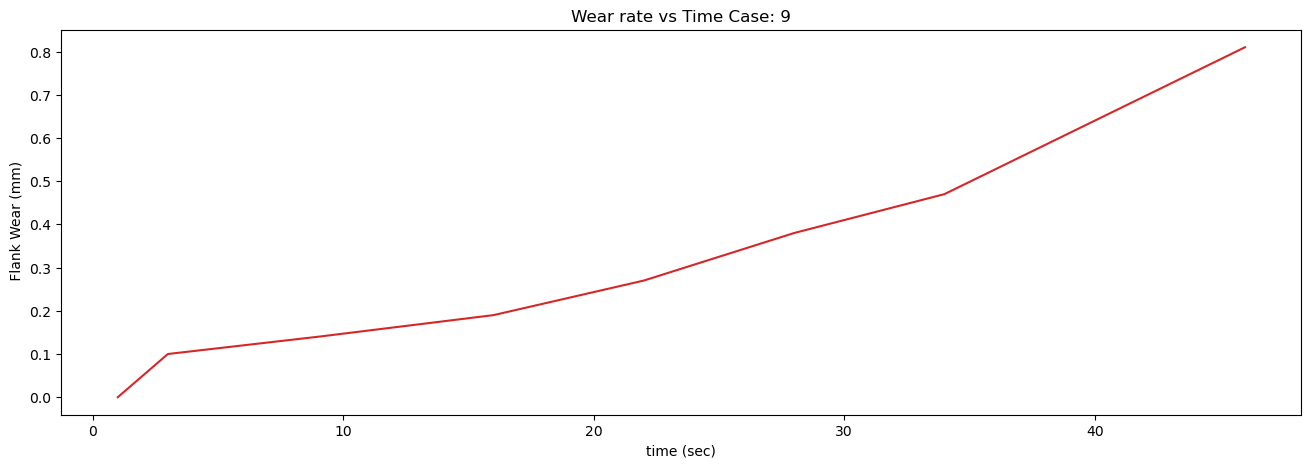

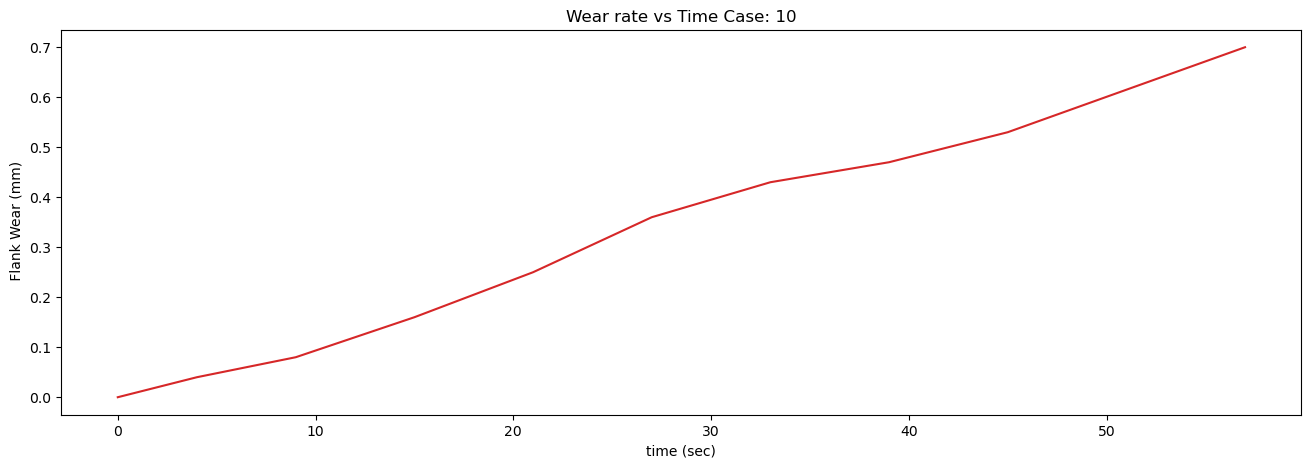

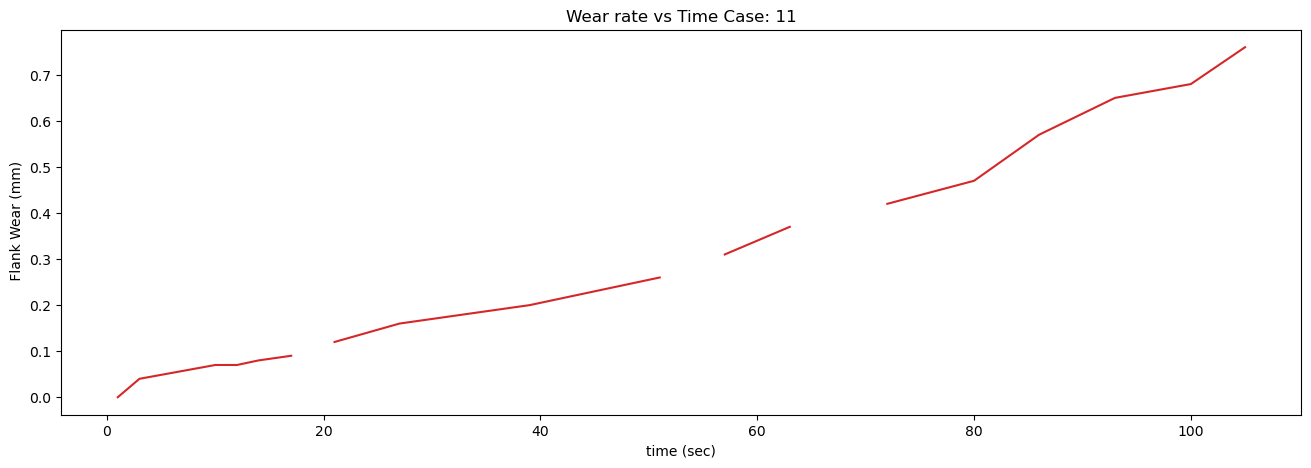

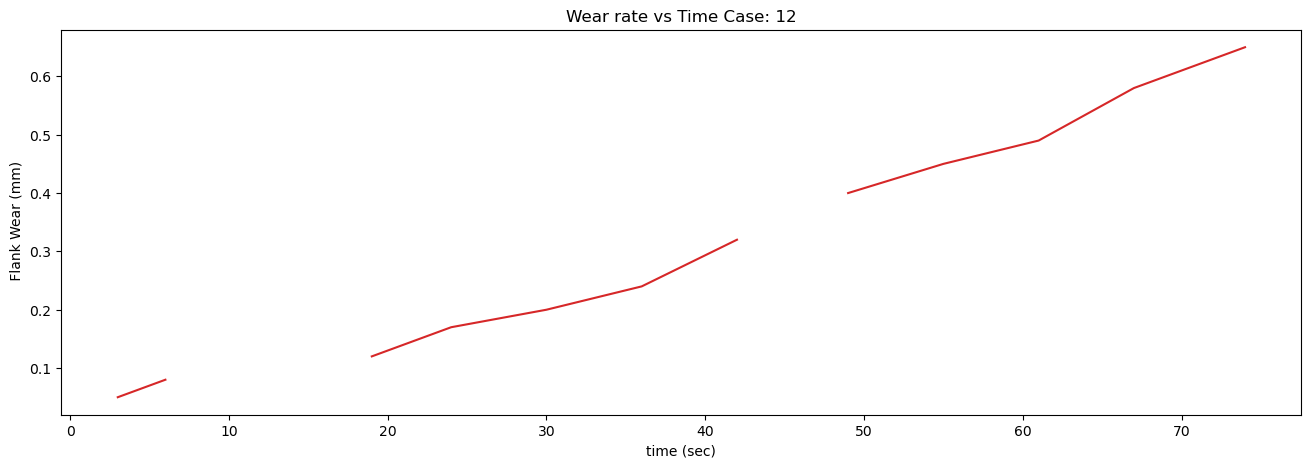

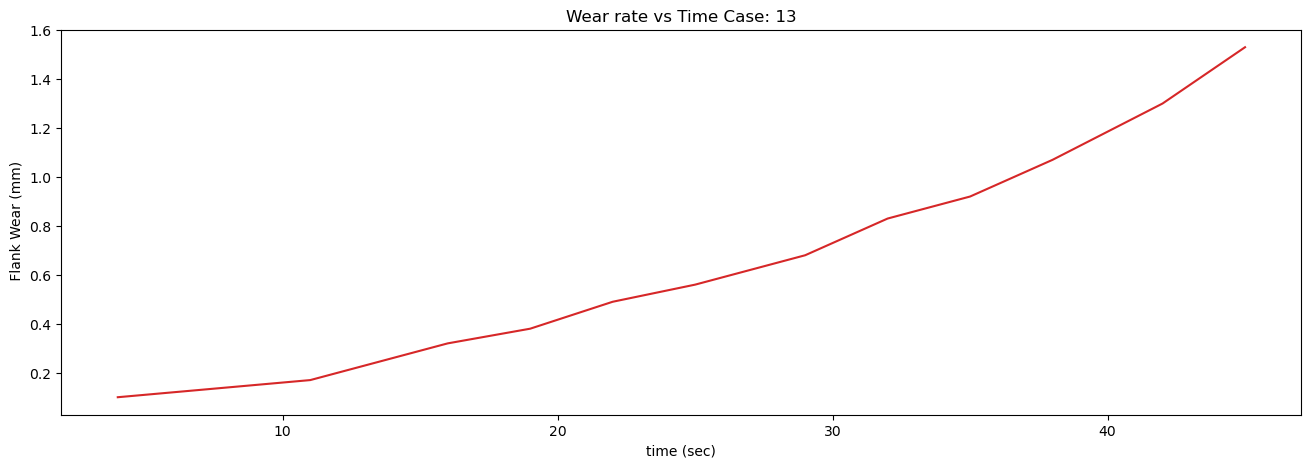

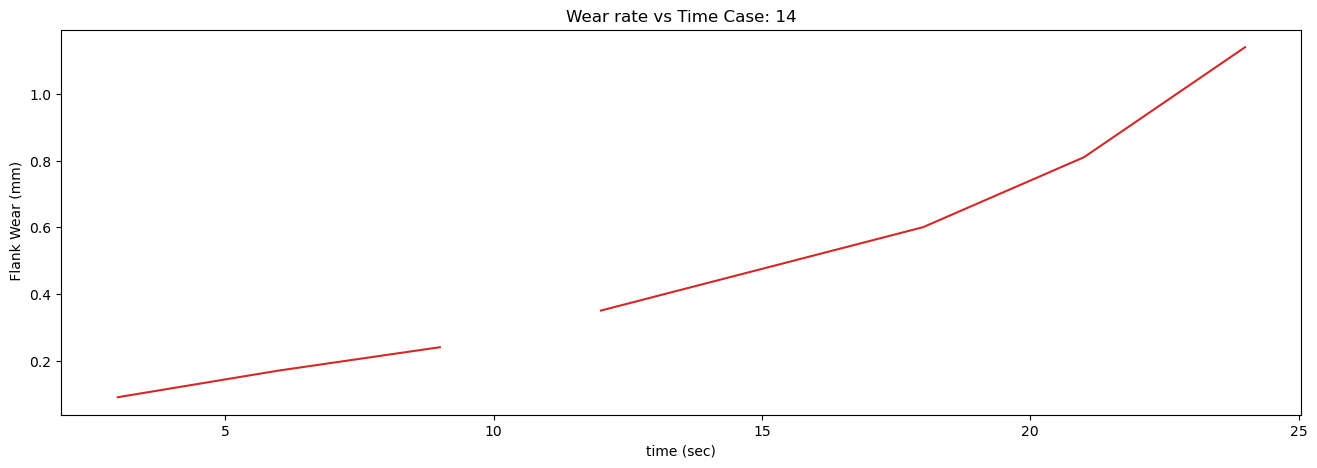

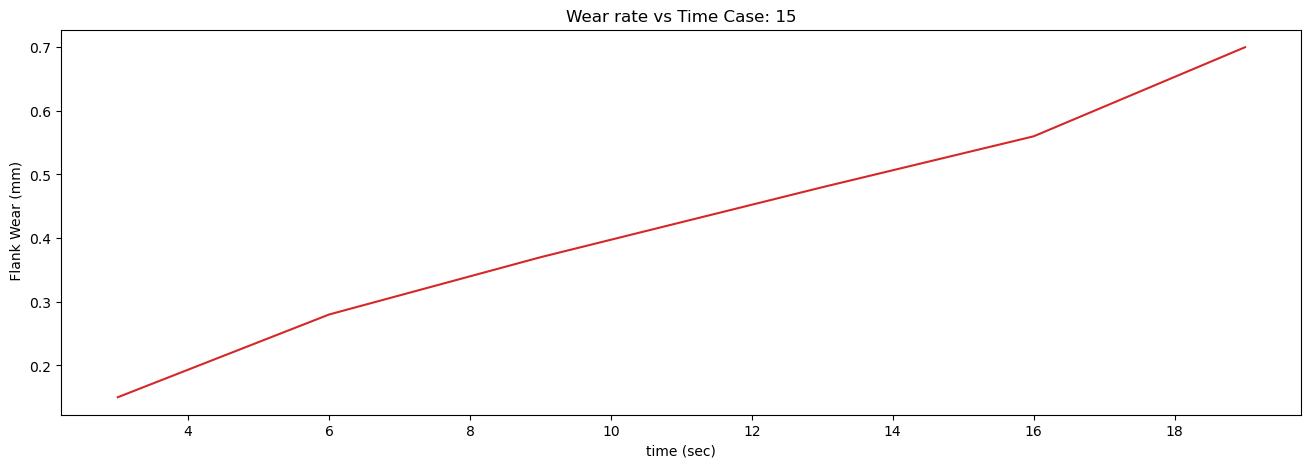

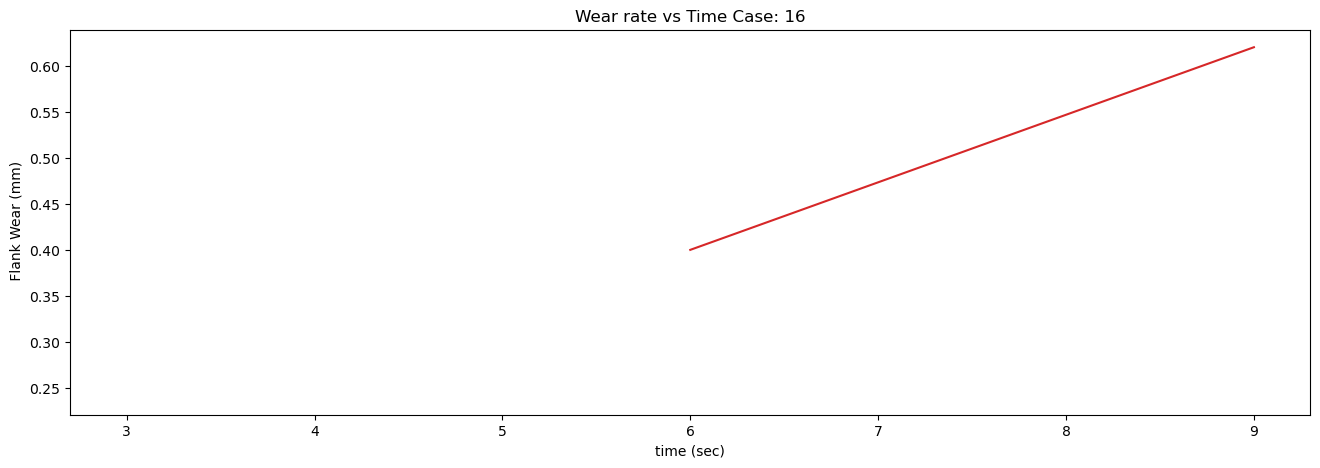

In [4]:
def plot_df(df, x, y, title="", xlabel='time (sec)', ylabel=' Flank Wear (mm)', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
for i in range(1,17):
    rx=df[df["case"]==i]
    tit = "Wear rate vs Time"+ " Case: " + str(i)
    plot_df(rx, x=rx.time, y=rx.VB, title=tit)    

In [5]:
np_data = df[['time', 'VB', 'run']].to_numpy()

np_data[np_data[:,2] == 1,1]=0 # fill up all first runs with 0
for count, (time, vb, run) in enumerate(np_data):
    if not np.isnan(vb): continue    
    np_data[count,1] = np.interp(time, np_data[[count-1, count+1],0], np_data[[count-1, count+1],1])

In [6]:
for count, (time, vb, run) in enumerate(np_data):
    if not np.isnan(vb):continue
    if np.isnan(np_data[count+1,1]):
        np_data[count,1] = np.interp(time, np_data[[count-1, count+2],0], np_data[[count-1, count+2],1])
    else:
        np_data[count,1] = np.interp(time, np_data[[count-1, count+1],0], np_data[[count-1, count+1],1])

In [7]:
df['target'] = np_data[:,1]
df = df.query('case != 6')

In [8]:
df.head()

,Unnamed: 0,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle,target
0,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760,0.000
1,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487,0.044
2,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980,0.088
3,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771,0.110
4,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474,0.155


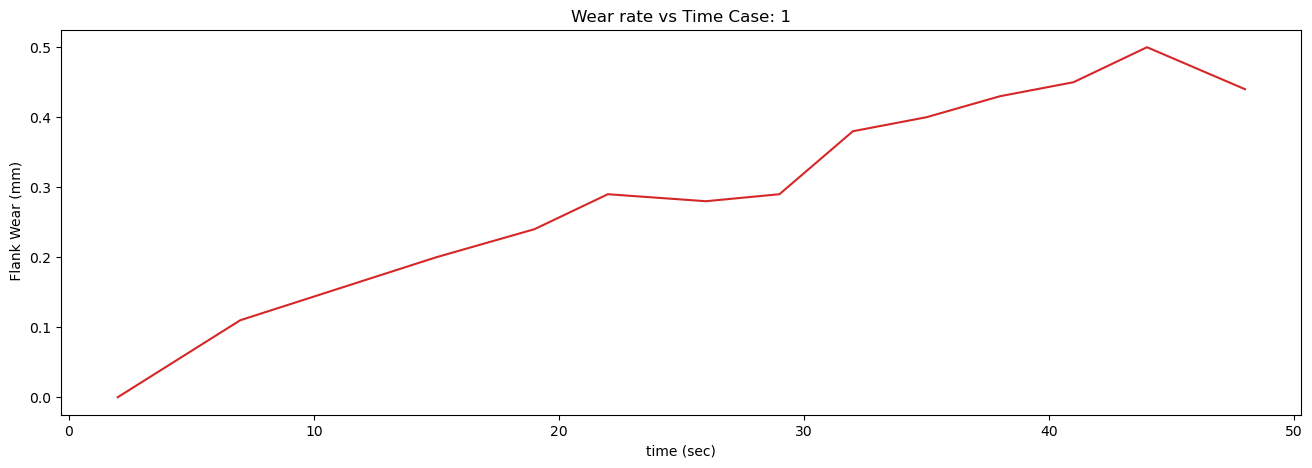

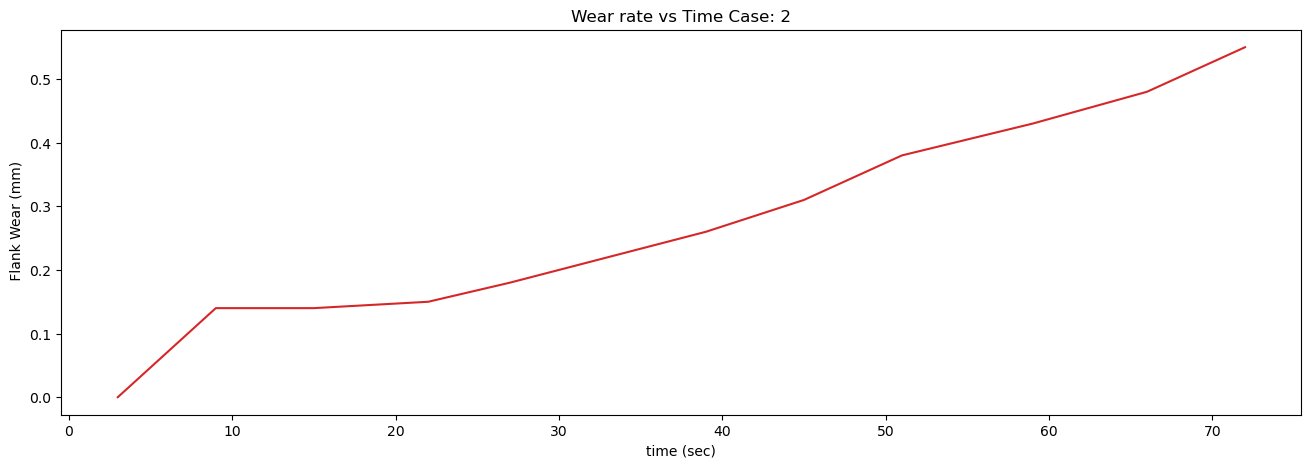

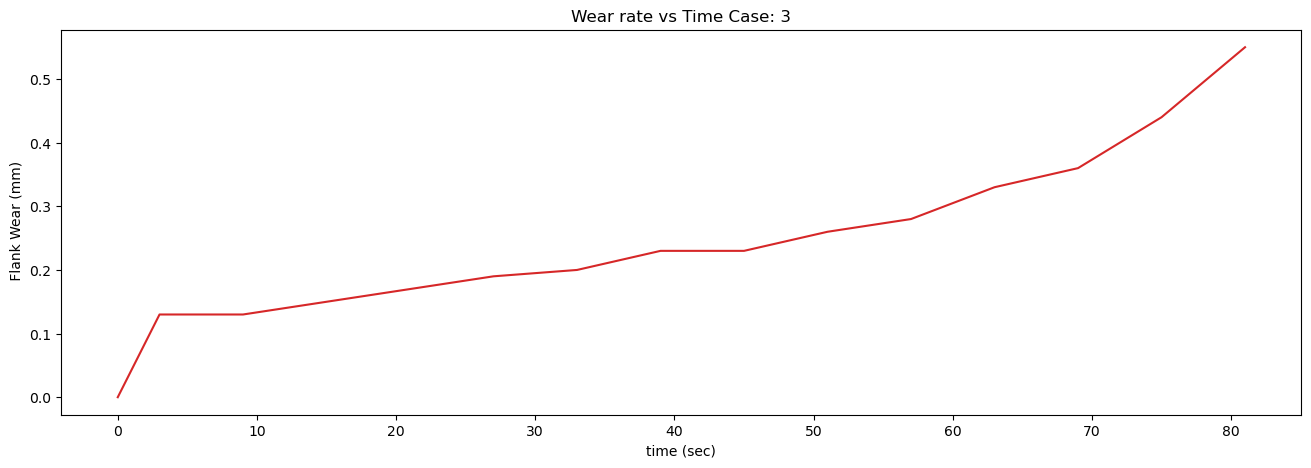

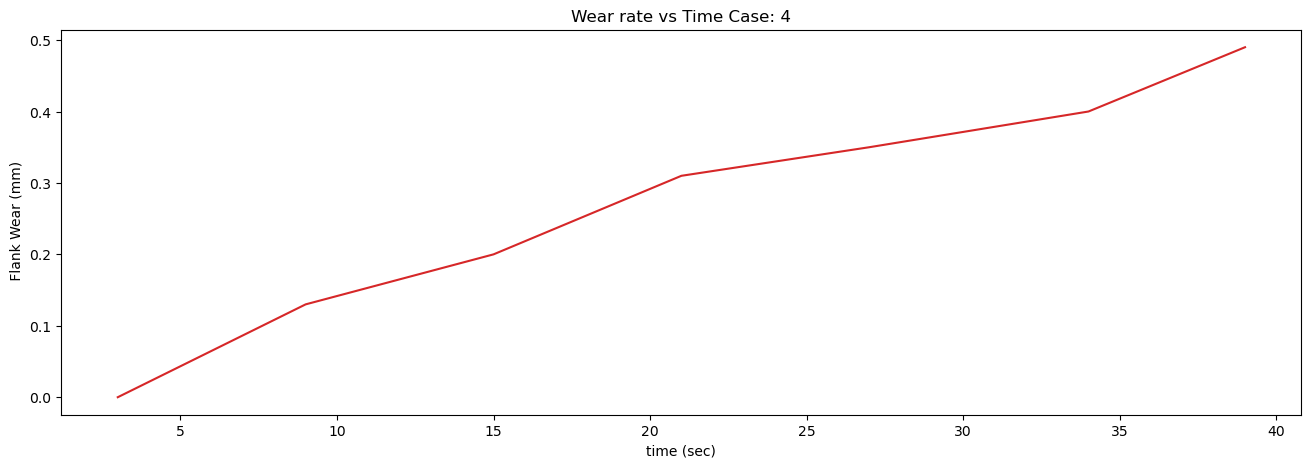

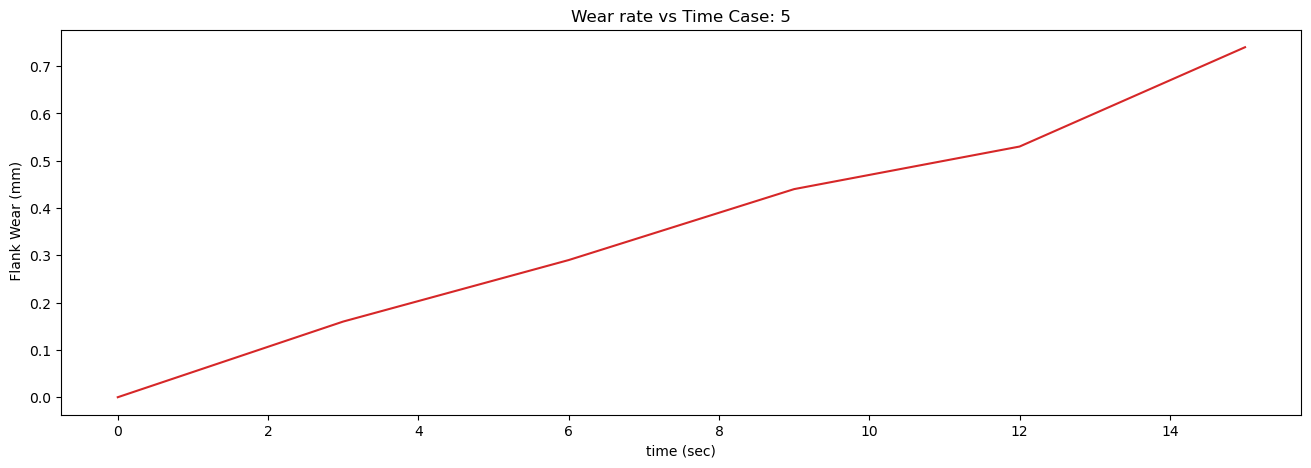

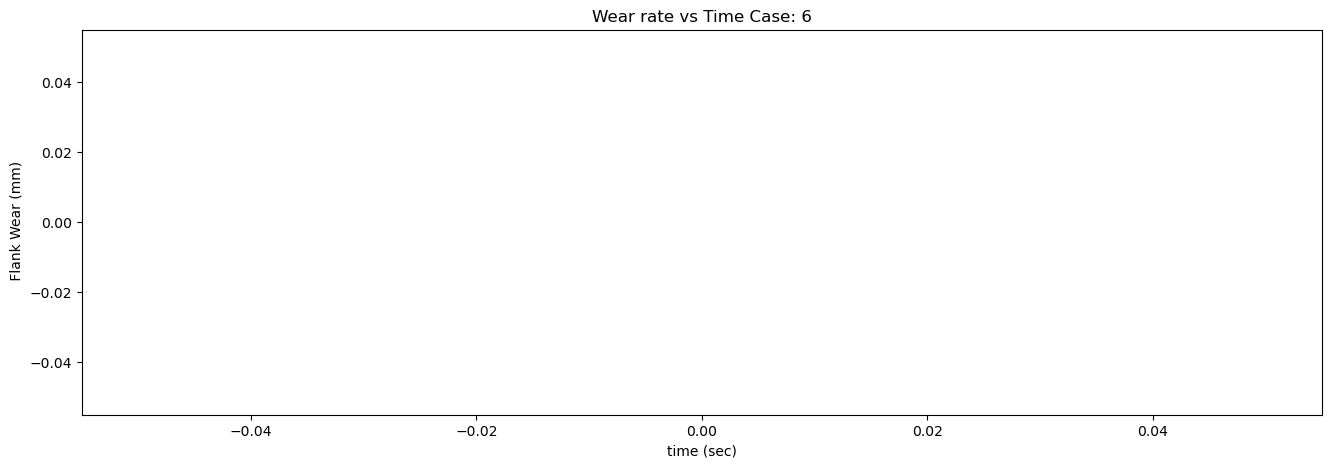

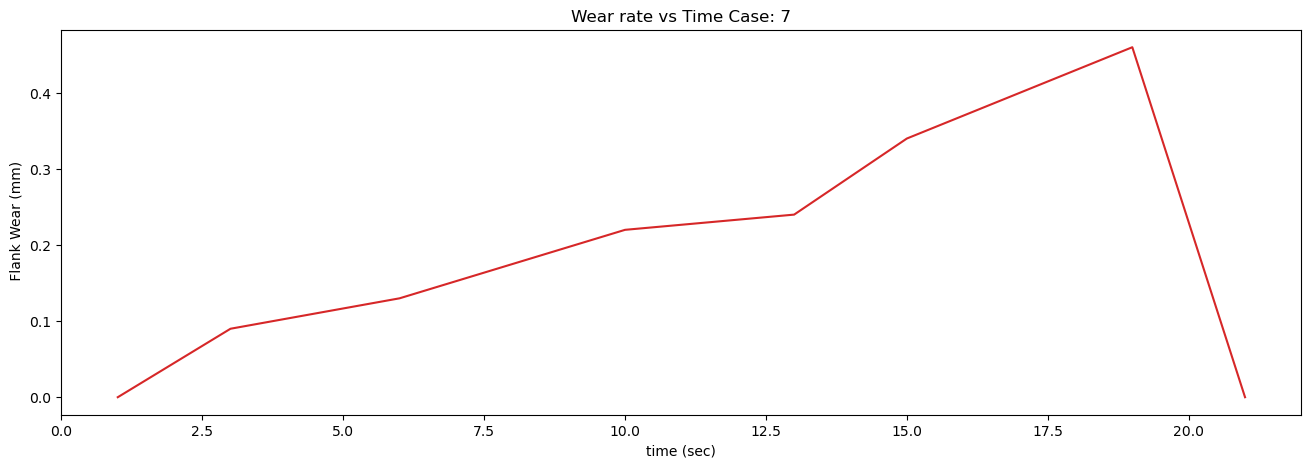

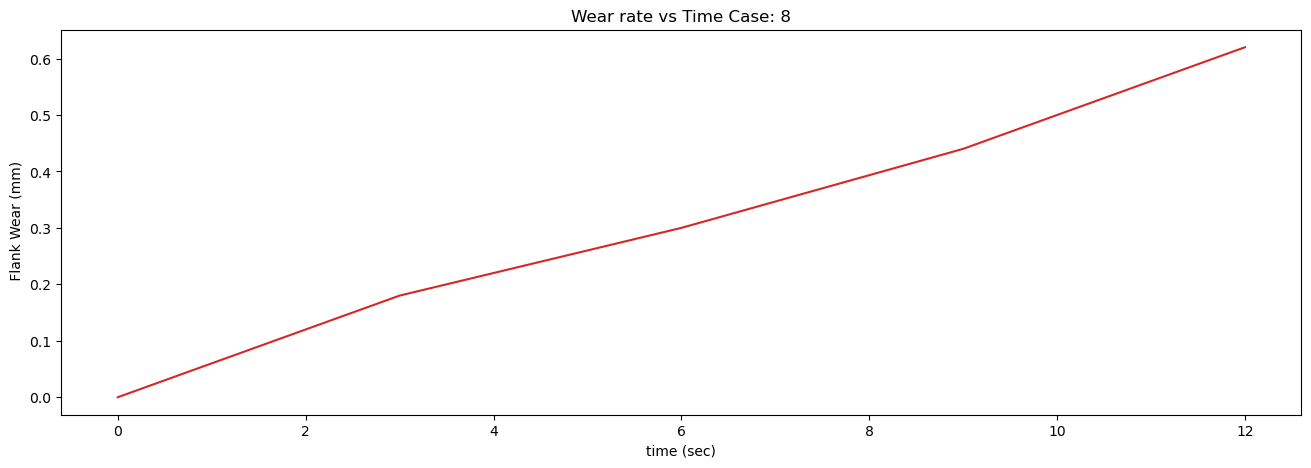

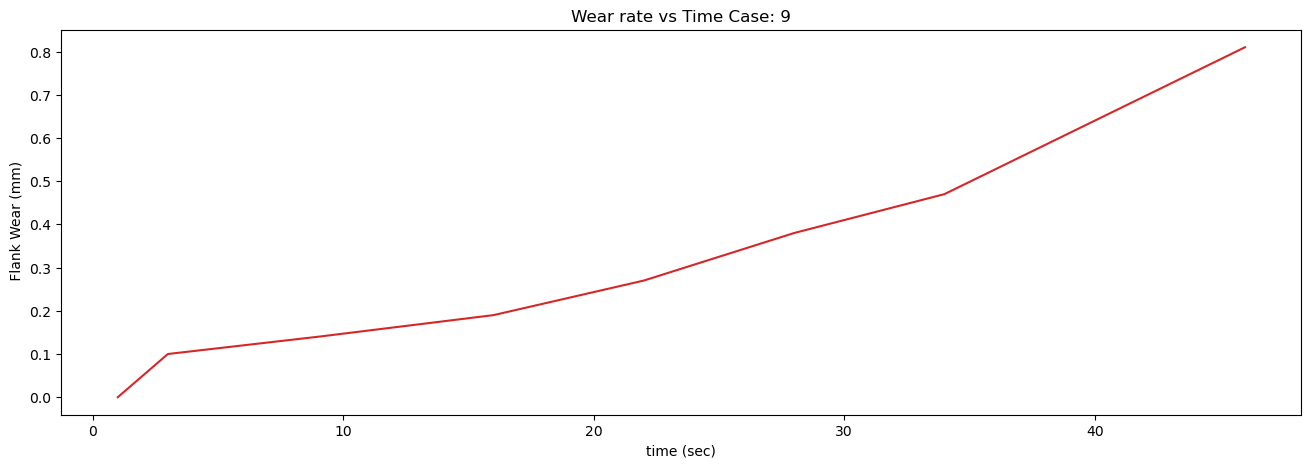

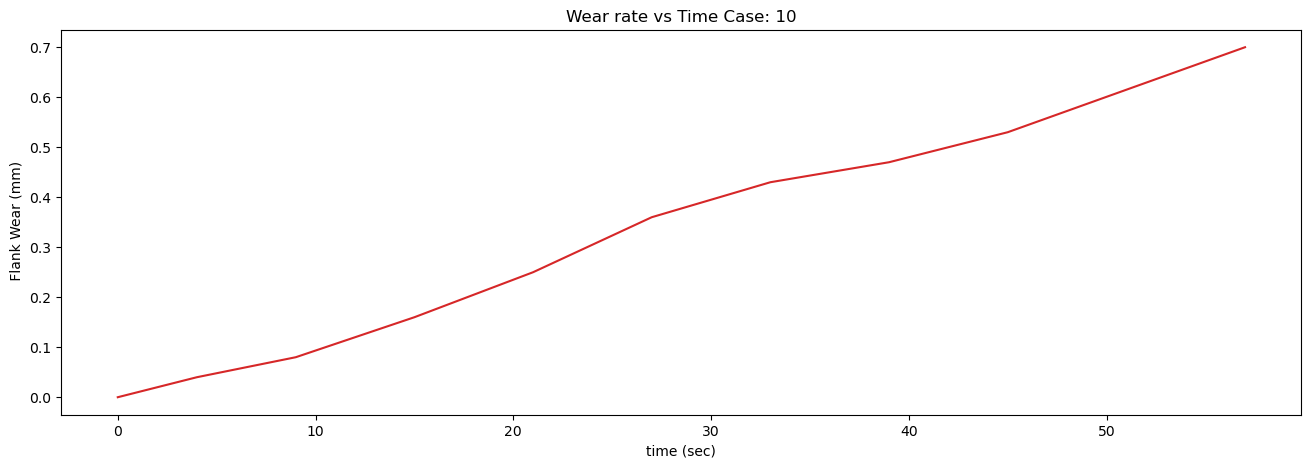

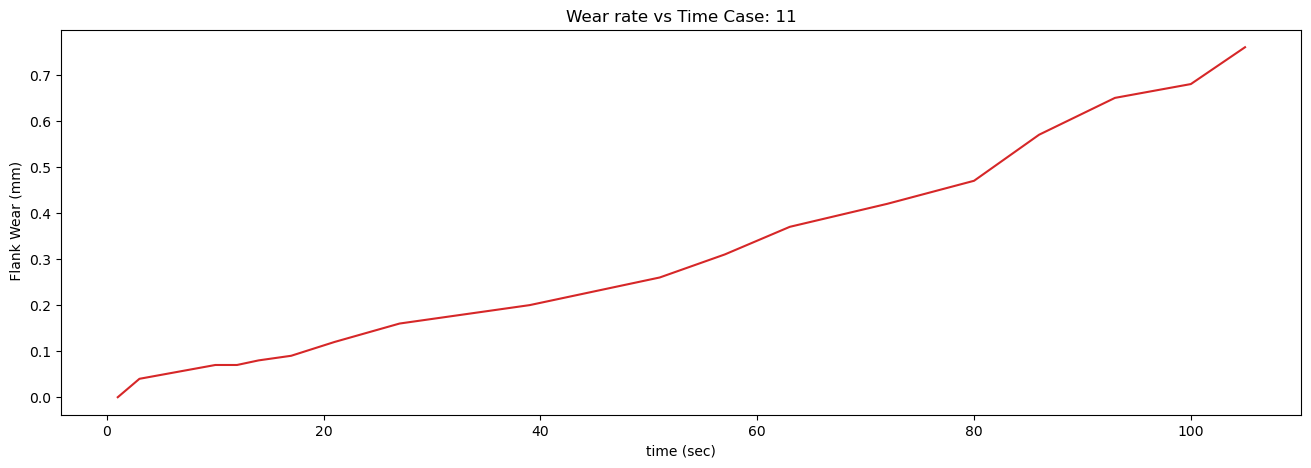

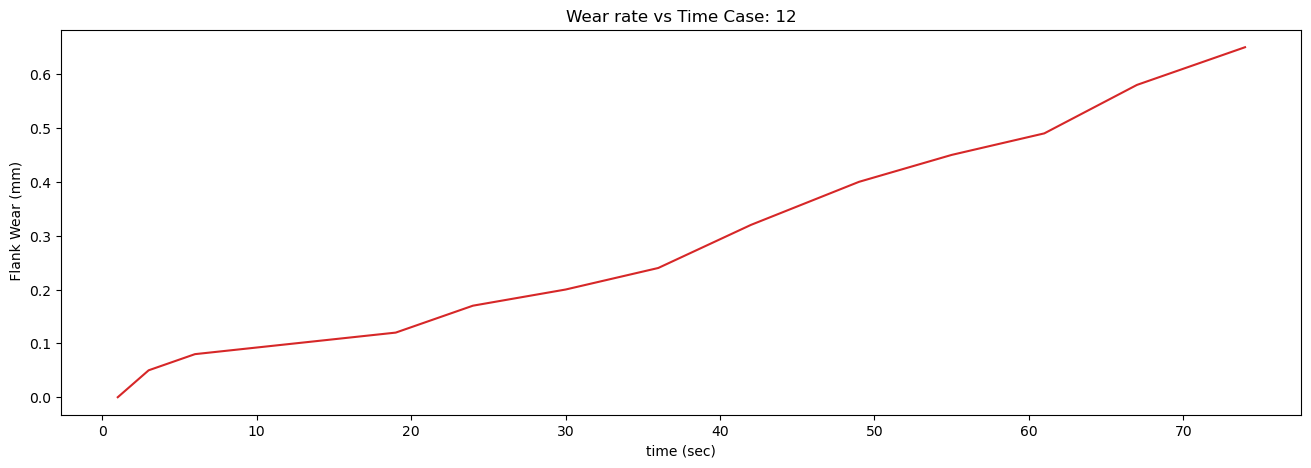

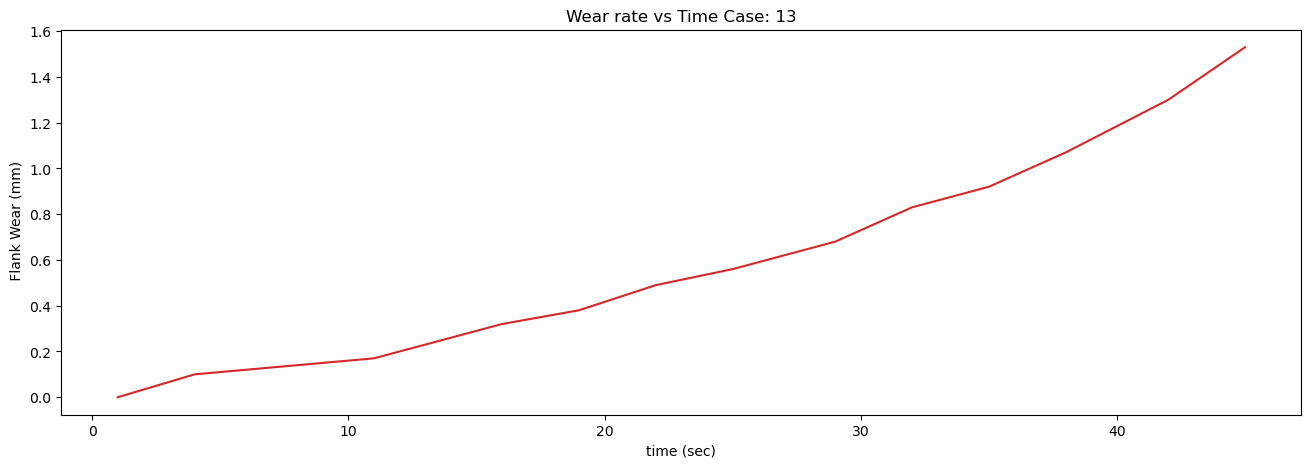

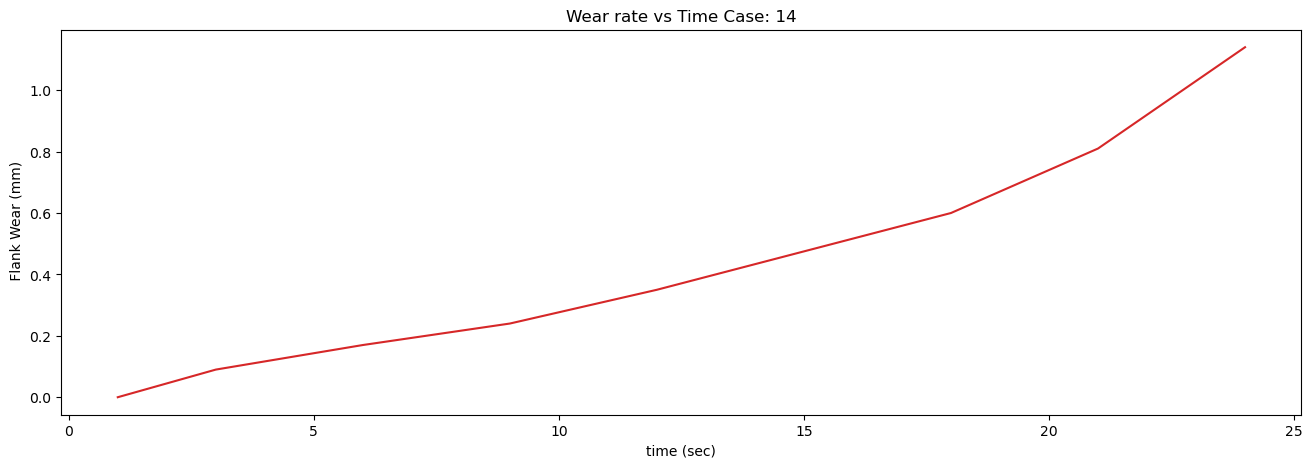

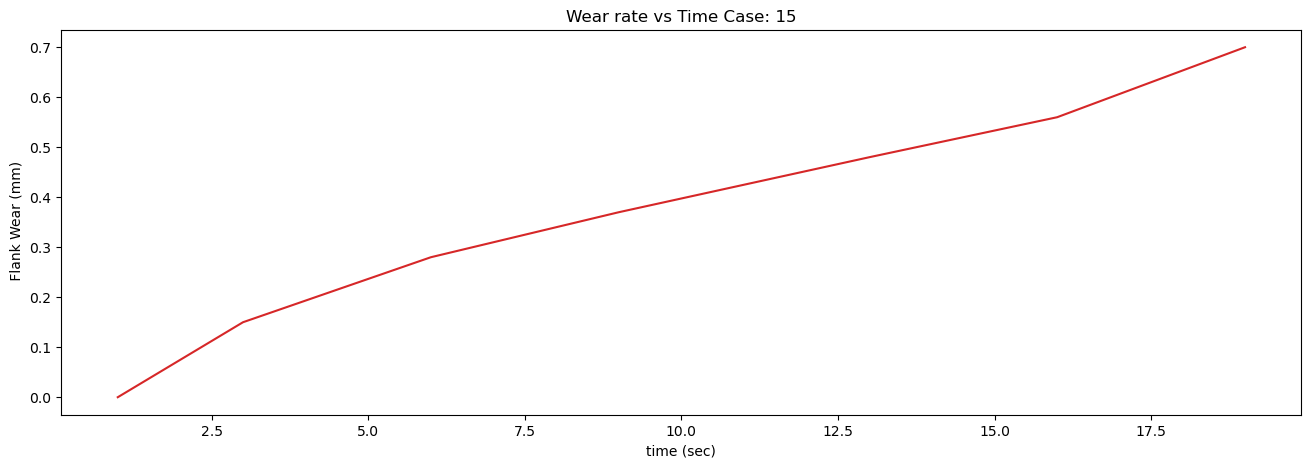

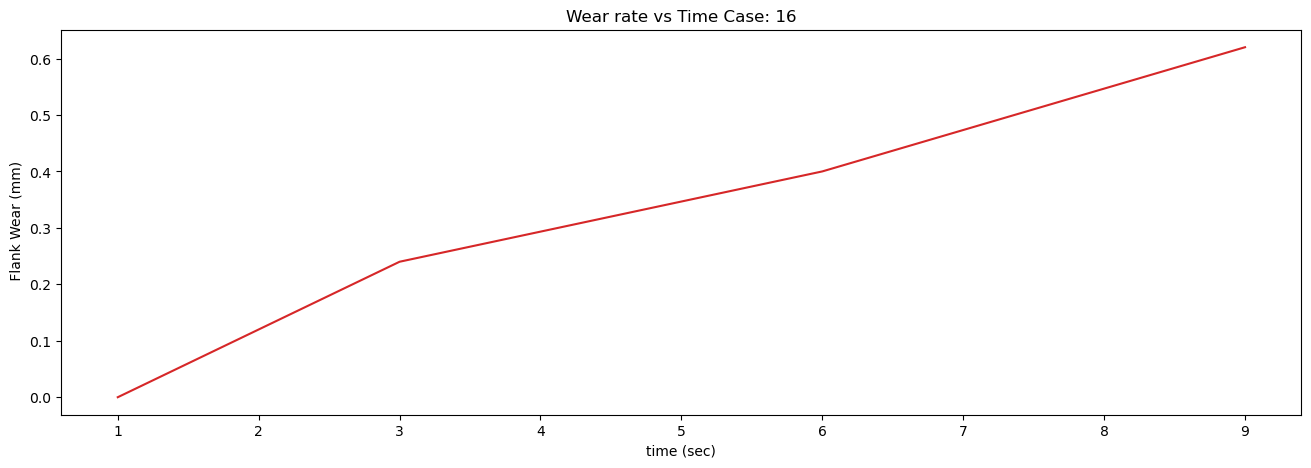

In [9]:
def plot_df(df, x, y, title="", xlabel='time (sec)', ylabel=' Flank Wear (mm)', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
for i in range(1,17):
    rx=df[df["case"]==i]
    tit = "Wear rate vs Time"+ " Case: " + str(i)
    plot_df(rx, x=rx.time, y=rx.target, title=tit)    

### Correlation Analysis

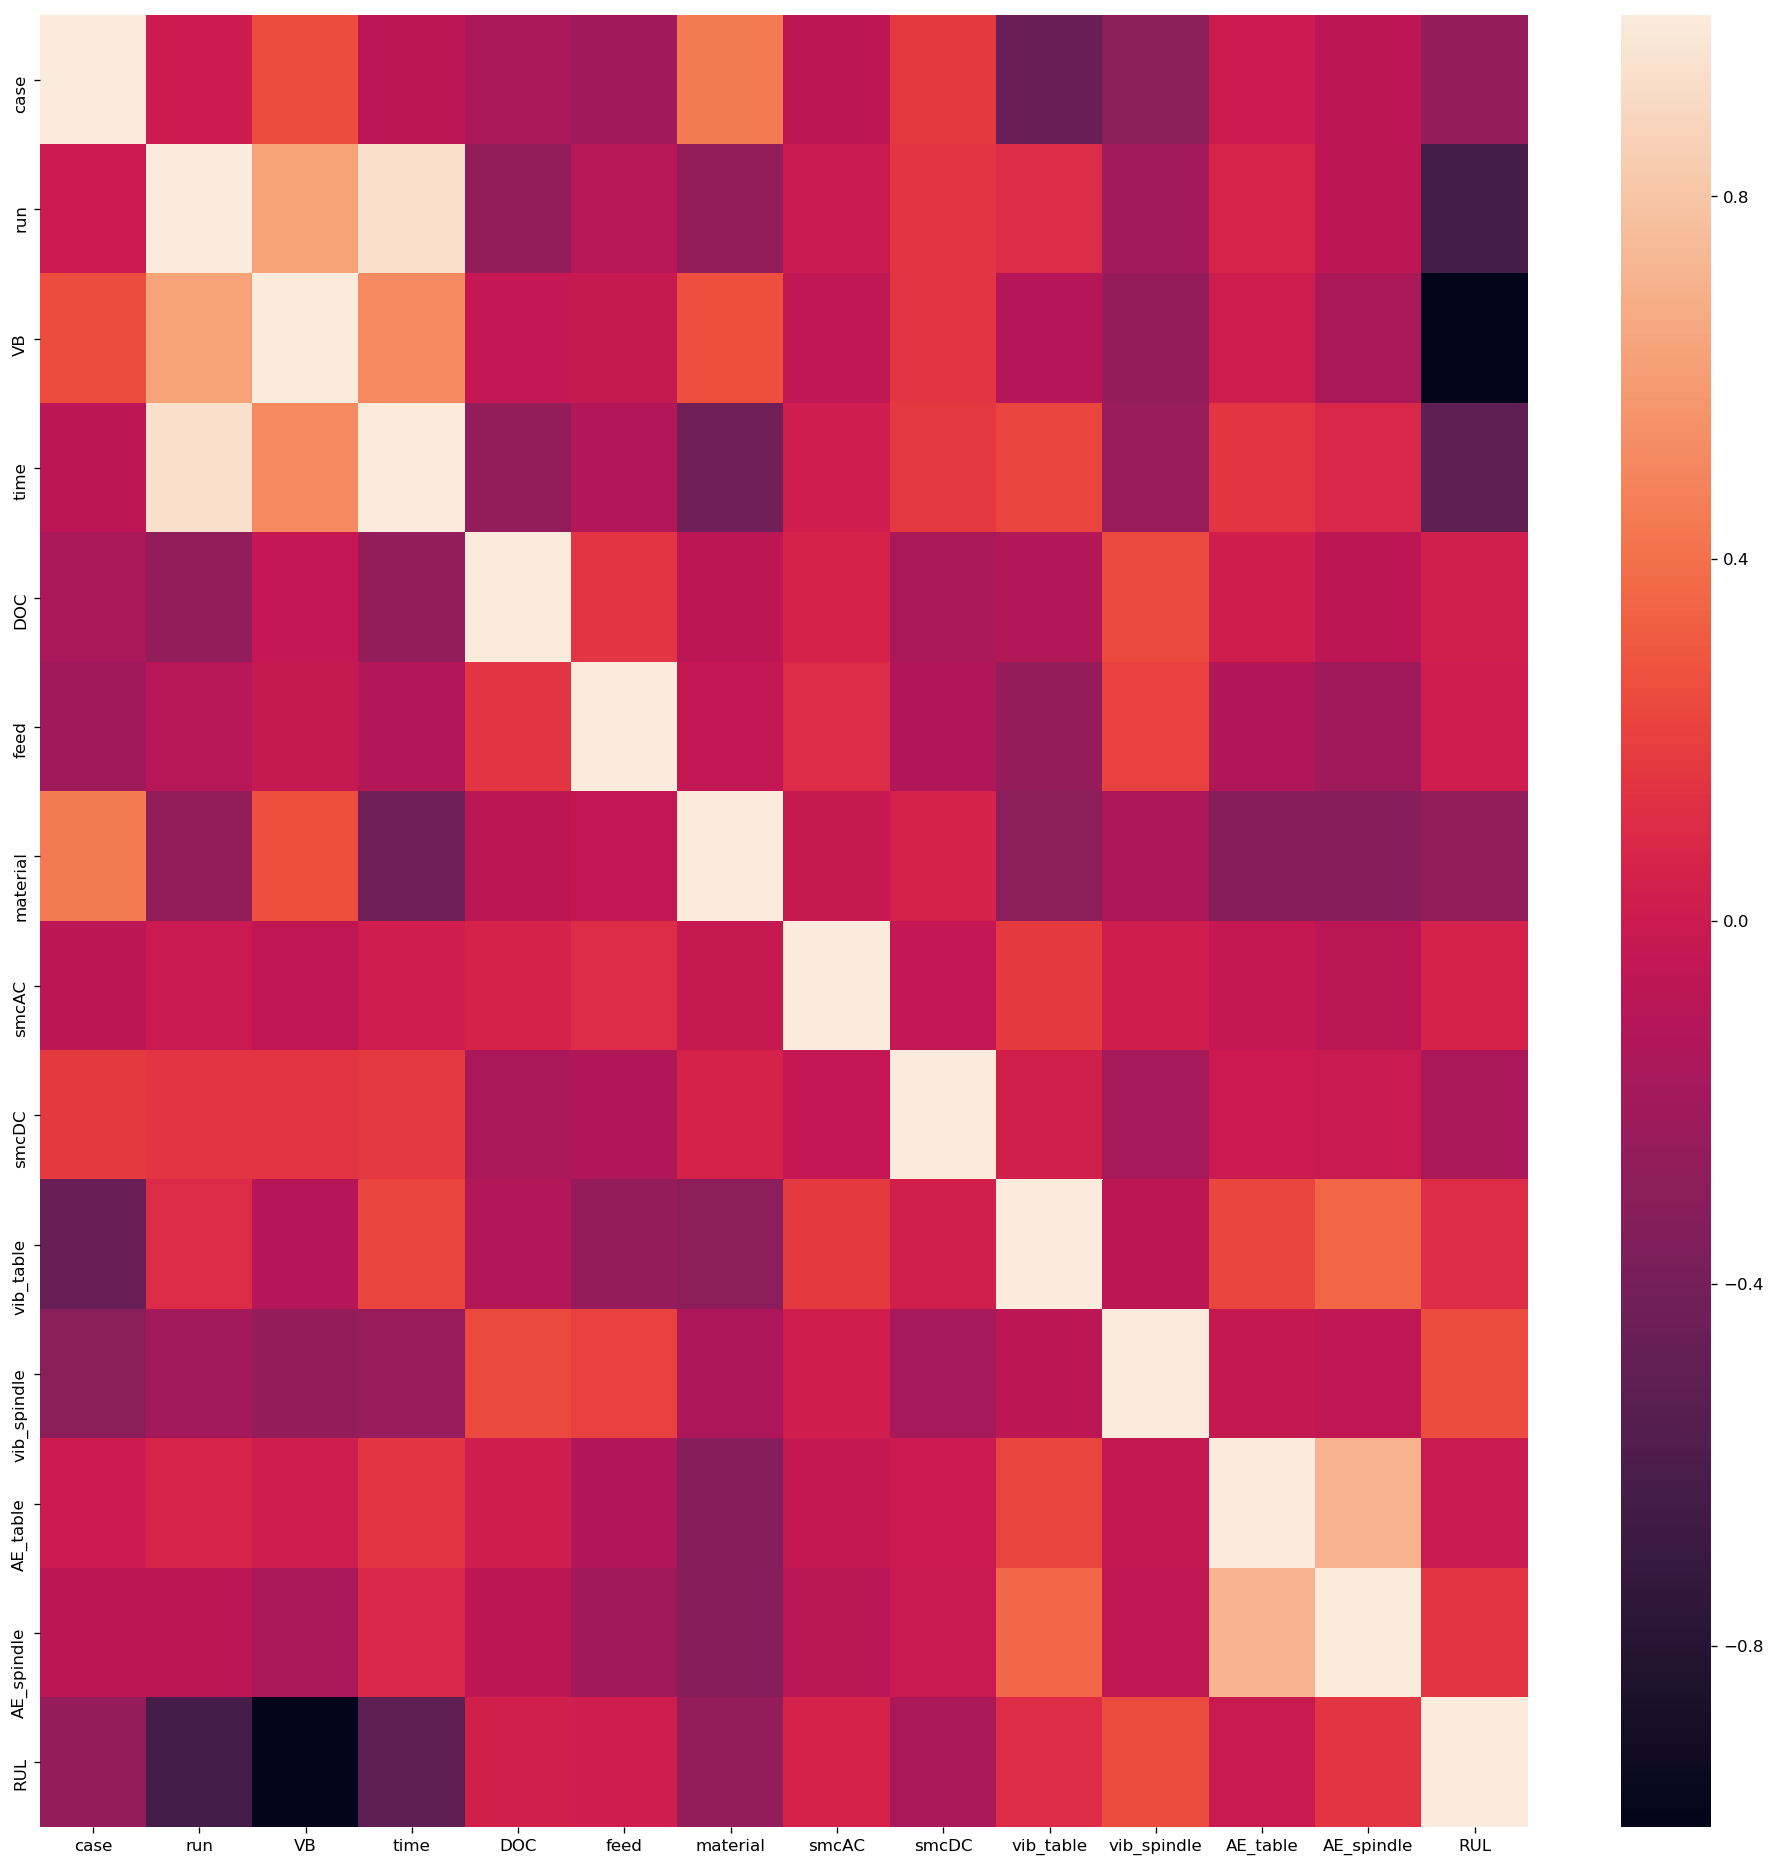

In [4]:
df_correlation=df.corr()
df_correlation.dropna(thresh=1,inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(df_correlation)



### Conclusion
One can see that run, time, VB (wear) have a significant impact in RUL

Note: We will be dropping VB while running ML algorithms because it is not possible to calculate tool wear using sensors

# Importing Required Libraries

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.svm import SVR
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# ML model training

Depending upon the duration and total wear, RUL was calculated and added to the dataset. Now RUL is predicted based on parameters like time, depth of cut, feed, material, current supplied, vibration of spindle and table, acoustic emissions of spindle and data. 12 Machine Learning models were chosen. 

# Dataframe Creation

In [10]:
#data = pd.read_csv("/kaggle/input/millings/smillo.csv")

# Split data into input and target variables
X = df[['time', 'DOC', 'feed', 'material','smcAC','smcDC','vib_table','vib_spindle', 'AE_table','AE_spindle']]
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear Regression

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression - MAE: {:.2f}, R2: {:.2f}".format(mae_lr, r2_lr))

Linear Regression - MAE: 0.08, R2: 0.69


# Random Forest Regression

In [14]:
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regression - MAE: {:.2f}, R2: {:.2f}".format(mae_rf, r2_rf))

Random Forest Regression - MAE: 0.08, R2: 0.77


# Random Forest Regression -  Optimisation using grid parameter search

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10]}

# Instantiate the model and GridSearchCV
model = RandomForestRegressor()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)

# Fit the model with the parameter grid
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print('Best parameters:', grid_search.best_params_)


y_pred_gb = grid_search.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("RFC optimsed - MAE: {:.2f}, R2: {:.2f}".format(mae_gb, r2_gb))

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
RFC optimsed - MAE: 0.08, R2: 0.75


# Gradient Boosting Regression

In [19]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Gradient Boosting Regression
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression - MAE: {:.2f}, R2: {:.2f}".format(mae_gb, r2_gb))


Gradient Boosting Regression - MAE: 0.10, R2: 0.72


# Gradient Boosting Regression Optimised

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the hyperparameter grid
param_grid = {'n_estimators': [250, 265, 260 ],
              'learning_rate': [0.1,0.05, 0.07],

              'min_samples_split': [ 15, 16, 17],
              }

# Create a GradientBoostingRegressor object
gbm = GradientBoostingRegressor()

# Perform grid search with cross-validation
grid_search_GB = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5)

# Fit the model to the training data
grid_search_GB.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding score
print('Best parameters:', grid_search_GB.best_params_)


y_pred_gbb = grid_search_GB.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gbb)
r2_gb = r2_score(y_test, y_pred_gbb)

print("Gradient Boosting Regression (Optimised)- MAE: {:.2f}, R2: {:.2f}".format(mae_gb, r2_gb))



Best parameters: {'learning_rate': 0.07, 'min_samples_split': 16, 'n_estimators': 260}
Gradient Boosting Regression (Optimised)- MAE: 0.10, R2: 0.69


# Ensembling Gradient Boost with Random Forest Regression

In [18]:
ensemble_pred = (y_pred_gb*3 +y_pred_rf*1)/4
mae_gb = mean_absolute_error(y_test, ensemble_pred)
r2_gb = r2_score(y_test, ensemble_pred)

print("Ensembled Model- MAE: {:.2f}, R2: {:.2f}".format(mae_gb, r2_gb))

Ensembled Model- MAE: 0.12, R2: 0.61


### In conclusion, Random Forest Regression is considered as the best model as it has MAE of 8% and R-2 score of 0.77 making the model ideal for identifying RUL of a tool

# Tool Wear Detection

## Dataframe Creation

There are 18 different sets of experiments, they have different sensor data they are stored as experiment_{num}.csv where num represents the experiment number. Some of the experiments were done with a worn out tool whereas some other experiments were run with a tool in good condition. In this way we have both faulty and healthy data when it comes to monitoring the sensors. This particular data is stored as train.csv 

Thus it becomes important to combine them together

In [21]:
frames = list()
results = pd.read_csv("Data/archive/train.csv")
for i in range(1,19):
    exp = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("Data/archive/experiment_{}.csv".format(exp))
    row = results[results['No'] == i]
    frame['target'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
    frames.append(frame)
df = pd.concat(frames, ignore_index = True)
df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,target
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,...,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,...,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,...,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,...,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,...,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,0


## Feature Extraction

Here we run a classic correlation analysis

In [22]:
df_correlation=df.corr()
df_correlation.dropna(thresh=1,inplace=True)
df_correlation.drop(columns=['Z1_CurrentFeedback','Z1_DCBusVoltage','Z1_OutputCurrent','Z1_OutputVoltage','S1_SystemInertia','target'],inplace=True)
plt.figure(figsize=(20,20))
sns.heatmap(df_correlation)



ValueError: could not convert string to float: 'Starting'

#### Conclusion of correlation analysis

It has been found that there are no significant correlations between target and other variables, this is mainly because there is no linear relationship which implies a non linear model.

## Importing Libraries

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import numpy as np

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline



In [24]:
#Creating Test Train Splits
x=df.drop(columns=['target','Machining_Process'],axis=1)
y=np.array(df['target'])

X_train,X_test,y_train,y_test =train_test_split(x,y,train_size=0.8,random_state=100)


## Training ML algorithms

### Logistic Regression

In [25]:

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred_1 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred_1)
print("Accuracy: %.2f%%" % (acc * 100.0))
cnf_matrix = confusion_matrix(y_test, y_pred_1)
print(cnf_matrix)


Accuracy: 56.07%
[[ 854 1565]
 [ 657 1982]]


C:\Users\User222\anaconda3\envs\manufuture_project\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Support Vector Classification

In [26]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred_2 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred_2)
print("Accuracy: %.2f%%" % (acc * 100.0))
cnf_matrix = confusion_matrix(y_test, y_pred_2)
print(cnf_matrix)

Accuracy: 58.19%
[[ 834 1585]
 [ 530 2109]]


### Gaussian Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_3 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred_3)
print("Accuracy: %.2f%%" % (acc * 100.0))
cnf_matrix = confusion_matrix(y_test, y_pred_3)
print(cnf_matrix)

Accuracy: 54.61%
[[ 536 1883]
 [ 413 2226]]


### KNN Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred_4 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred_4)
print("Accuracy: %.2f%%" % (acc * 100.0))
cnf_matrix = confusion_matrix(y_test, y_pred_4)
print(cnf_matrix)


Accuracy: 76.02%
[[1816  603]
 [ 610 2029]]


### Decision Tree Classifier

In [29]:
classifier = DecisionTreeClassifier(max_depth=7)
classifier.fit(X_train, y_train)
y_pred_5 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred_5)
print("Accuracy: %.2f%%" % (acc * 100.0))
cnf_matrix = confusion_matrix(y_test, y_pred_5)
print(cnf_matrix)


Accuracy: 87.31%
[[1785  634]
 [   8 2631]]


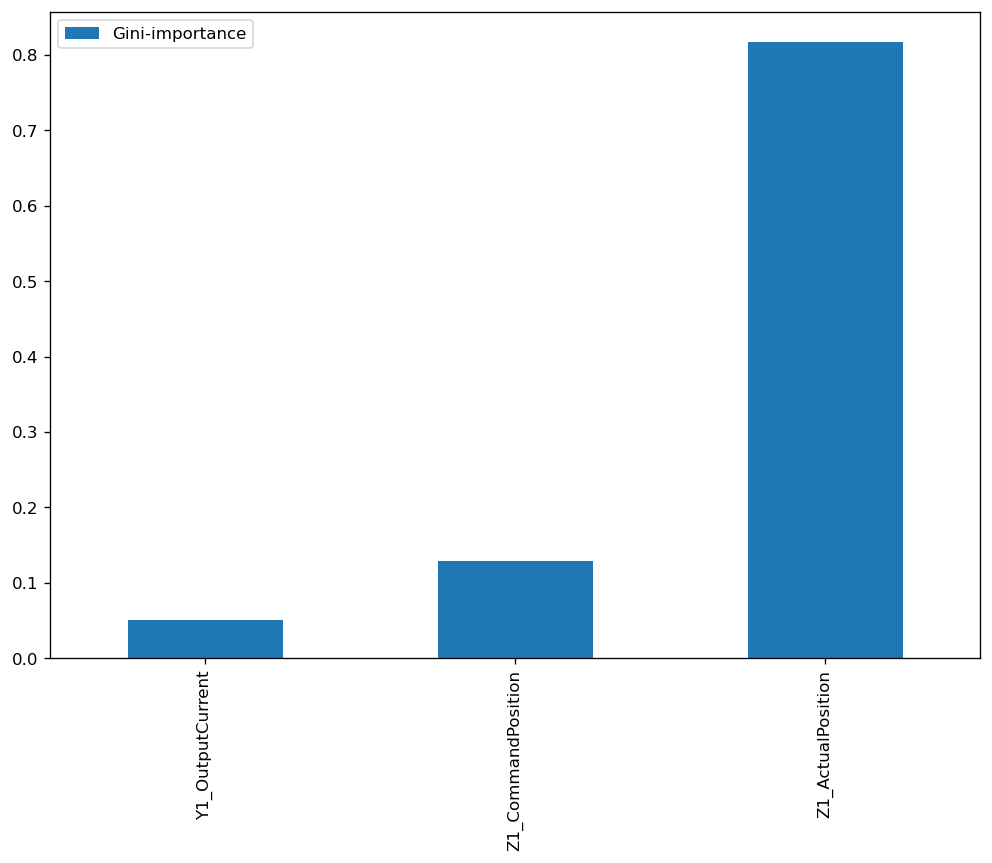

In [30]:
los=[]
for i in df.columns:
  if (i != 'target'):
    los.append(i)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(los, classifier.feature_importances_):
    if (importance>0.025):
        feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
classifier.feature_importances_
importances = classifier.feature_importances_
indices = np.argsort(importances)

### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier=RFC(n_estimators=100,criterion='entropy',random_state=0)

classifier.fit(X_train, y_train)
y_pred_6 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred_6)
print("Accuracy: %.2f%%" % (acc * 100.0))
cnf_matrix = confusion_matrix(y_test, y_pred_6)
print(cnf_matrix)


Accuracy: 99.35%
[[2399   20]
 [  13 2626]]


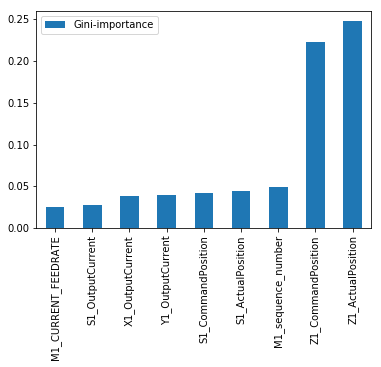

In [24]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(los, classifier.feature_importances_):
    if (importance>0.025):
        feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90)
classifier.feature_importances_
importances = classifier.feature_importances_
indices = np.argsort(importances)

### Optimizing Random Forest Classifier

In [32]:

# Generate some random data for example purposes

# Define the parameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
y_pred_6_5 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred_6_5)
print("Accuracy: %.2f%%" % (acc * 100.0))
cnf_matrix = confusion_matrix(y_test, y_pred_6_5)
print(cnf_matrix)



KeyboardInterrupt: 

### XG Boost Classifier

In [33]:
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
y_pred_7 = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred_7)
print("Accuracy: %.2f%%" % (acc * 100.0))
cnf_matrix = confusion_matrix(y_test, y_pred_7)
print(cnf_matrix)

Accuracy: 99.47%
[[2404   15]
 [  12 2627]]


In [34]:
# Feature importances
features = [(df.columns[i], v) for i,v in enumerate(classifier.feature_importances_)]
features.sort(key=lambda x: x[1], reverse = True)
for item in features[:10]:
    print("{0}: {1:0.4f}".format(item[0], item[1]))

Z1_CommandPosition: 0.2575
Z1_ActualPosition: 0.1655
Y1_DCBusVoltage: 0.0904
S1_DCBusVoltage: 0.0784
M1_CURRENT_FEEDRATE: 0.0707
Z1_CommandVelocity: 0.0608
X1_ActualPosition: 0.0509
X1_OutputCurrent: 0.0218
X1_DCBusVoltage: 0.0211
S1_ActualPosition: 0.0197


### Ensemble modelling

In [35]:
from statistics import mode
from scipy import stats as s


final_pred = np.array([])
for i in range(0,len(X_test)):
    
    final_pred = np.append(final_pred, s.mode([y_pred_7[i],y_pred_7[i],y_pred_7[i], y_pred_6[i],y_pred_6[i],y_pred_5[i], y_pred_5[i]])[0])

In [36]:
c = accuracy_score(y_test, final_pred)
print("Accuracy: %.2f%%" % (c * 100.0))
cnf_matrix = confusion_matrix(y_test, final_pred)
print(cnf_matrix)

Accuracy: 99.39%
[[2395   24]
 [   7 2632]]


## We have chosen the ensembled model as our best model. This is due to the fact that this is the model which produced the least number of false negatives and highest accuracy. The reason behind not wanting a false negative is because we don't want our ML model to tell that the tool has not worn when in face, it had actually worn out.